In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader

from config import Config
from fliker_img_comment_dataset import ImgCommentDataset
from img_embedding import ImageEmbedding
from img_util import show_img_tensor_CHW

from pathlib import Path


/opt/anaconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Enriched img id: /tmp/enriched_results.csv
tokens: 128000
tokenizer.is_fast: True
idx: 16011
idx: 66088
batch_img_tensor: torch.Size([2, 3, 512, 512])
batch_img_id_tensor: torch.Size([2])
batch_comment_encoding: torch.Size([2, 50])


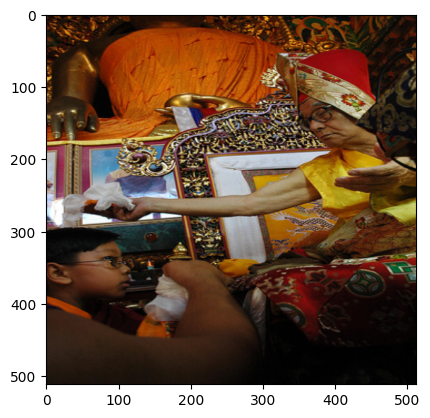

In [2]:
config = Config()

train_dataset = ImgCommentDataset(config, split="train")

BATCH_SIZE = 2
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

batch_img_tensor, batch_img_id_tensor, batch_comment_encoding, batch_comment_mask = next(iter(train_dataloader))
print(f"batch_img_tensor: {batch_img_tensor.size()}")
print(f"batch_img_id_tensor: {batch_img_id_tensor.size()}")
print(f"batch_comment_encoding: {batch_comment_encoding.size()}")
print(f"batch_comment_mask: {batch_comment_mask.size()}")
show_img_tensor_CHW(img_tensor=batch_img_tensor[0])

In [3]:
img_embedding = ImageEmbedding(config=config)
img_embedding = img_embedding(batch_img_tensor)
print(f"img_encoding: {img_embedding.size()}")

img_encoding: torch.Size([2, 1024, 728])


In [4]:
# -log(prob)= 0.3 -> prob = e**(-0.3)
2.718**(-0.357), 2.718**(-0.24), -torch.tensor(0.9).log()

(0.6997984004922808, 0.7866474359348317, tensor(0.1054))

In [5]:
batch_img_tensor[0].size()

torch.Size([3, 512, 512])

In [6]:
test_i = torch.rand(1, 5, 5)
test_i.size(), test_i.expand(3, -1, -1).size(), torch.allclose(test_i, test_i.expand(3, -1, -1))
test_i


tensor([[[0.9868, 0.8805, 0.8823, 0.2759, 0.0355],
         [0.9756, 0.1398, 0.7198, 0.0067, 0.6439],
         [0.2214, 0.1023, 0.9056, 0.0973, 0.3621],
         [0.8876, 0.1392, 0.0931, 0.9467, 0.7461],
         [0.9139, 0.7124, 0.9294, 0.8205, 0.3239]]])

In [7]:
test_i.expand(3, -1, -1)

tensor([[[0.9868, 0.8805, 0.8823, 0.2759, 0.0355],
         [0.9756, 0.1398, 0.7198, 0.0067, 0.6439],
         [0.2214, 0.1023, 0.9056, 0.0973, 0.3621],
         [0.8876, 0.1392, 0.0931, 0.9467, 0.7461],
         [0.9139, 0.7124, 0.9294, 0.8205, 0.3239]],

        [[0.9868, 0.8805, 0.8823, 0.2759, 0.0355],
         [0.9756, 0.1398, 0.7198, 0.0067, 0.6439],
         [0.2214, 0.1023, 0.9056, 0.0973, 0.3621],
         [0.8876, 0.1392, 0.0931, 0.9467, 0.7461],
         [0.9139, 0.7124, 0.9294, 0.8205, 0.3239]],

        [[0.9868, 0.8805, 0.8823, 0.2759, 0.0355],
         [0.9756, 0.1398, 0.7198, 0.0067, 0.6439],
         [0.2214, 0.1023, 0.9056, 0.0973, 0.3621],
         [0.8876, 0.1392, 0.0931, 0.9467, 0.7461],
         [0.9139, 0.7124, 0.9294, 0.8205, 0.3239]]])